# C4 scatter vs Energy resolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

## Datasets

In [2]:
# filename_bi = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_spherecenter_440keV_1MBq_10s_readout.root'
# filename_fr = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_spherecenter_218keV_1MBq_10s_readout.root'

filename_bi = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_col15gmL_spherecenter_440keV_1MBq_10s_readout.root'
filename_fr = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_col15gmL_spherecenter_218keV_1MBq_10s_readout.root'

# filename_bi = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_spherecenter_440keV_1MBq_100s_readout.root'
# filename_fr = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_spherecenter_218keV_1MBq_100s_readout.root'



In [3]:
f = uproot.open(filename_bi)
singles = f['Singles']
singles_bi = singles.arrays()
f = uproot.open(filename_fr)
singles = f['Singles']
singles_fr = singles.arrays()

## Add energy resolution

In [4]:
EREF = 0.140           # MeV
ERES_FWHM = 0.05       # Fraction of EREF
ERES_SIGMA = ERES_FWHM/2.355 # FWHM -> Sigma

energy_bi = np.random.normal(singles_bi['energy'], 
                             ERES_SIGMA*EREF*np.sqrt(EREF/singles_bi['energy']))
energy_fr = np.random.normal(singles_fr['energy'], 
                             ERES_SIGMA*EREF*np.sqrt(EREF/singles_fr['energy']))

## Energy distributions

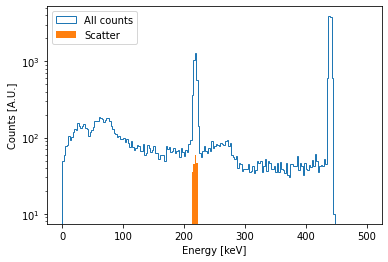

In [5]:
energy_all = np.concatenate((energy_fr,energy_bi))
energy_bi_cut = energy_bi[(energy_bi>0.218*(1-ERES_SIGMA)) & (energy_bi<0.218*(1+ERES_SIGMA))]

plt.hist(energy_all*1e3,bins=200,range=(0,500.),histtype='step',label='All counts')
plt.hist(energy_bi_cut*1e3,bins=200,range=(0,500.),label='Scatter')

# plt.hist(singles_all['energy']*1e3,bins=100,range=(0,500.),histtype='step')
# plt.hist(singles_bi['energy']*1e3,bins=100,range=(0,500.),histtype='step')
# plt.hist(singles_fr['energy']*1e3,bins=100,range=(0,500.),histtype='step')

plt.xlabel('Energy [keV]')
plt.ylabel('Counts [A.U.]')
plt.yscale('log')

plt.legend(loc='upper left')

plt.show()

## Calculate downscatter

In [6]:
e_ress = np.linspace(0.01,0.10,10)

In [7]:
def downscatter(bi,fr,fwhm):
    sigma = fwhm/2.355
    count_fr = len(fr[(fr>0.218*(1-sigma)) & (fr<0.218*(1+sigma))])
    count_bi = len(bi[(bi>0.218*(1-sigma)) & (bi<0.218*(1+sigma))])
    return count_bi/(count_fr + count_bi)

In [8]:
def calc_dscatter_fwhm(bi,fr,fwhm):
    energy_bi = np.random.normal(bi['energy'], 
                             fwhm/2.355*EREF*np.sqrt(EREF/bi['energy']))
    energy_fr = np.random.normal(fr['energy'], 
                             fwhm/2.355*EREF*np.sqrt(EREF/fr['energy']))
    dscatter = downscatter(energy_bi,energy_fr,fwhm)
    
    return dscatter

[]

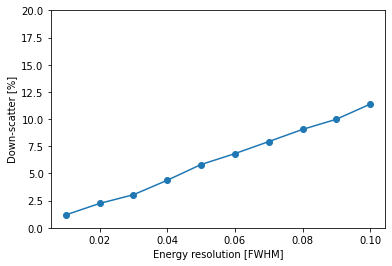

In [9]:
dscatters = np.array([calc_dscatter_fwhm(singles_bi,singles_fr,e_res) 
                      for e_res in e_ress])

plt.plot(e_ress,dscatters*100,marker='o')
plt.ylim(0,20.)
plt.ylabel('Down-scatter [%]')
plt.xlabel('Energy resolution [FWHM]')
plt.plot()

In [10]:
dscatters

array([0.01187335, 0.02239789, 0.03042071, 0.04372624, 0.05820106,
       0.06823094, 0.07929247, 0.09050313, 0.09982227, 0.11374819])

## Summary plot

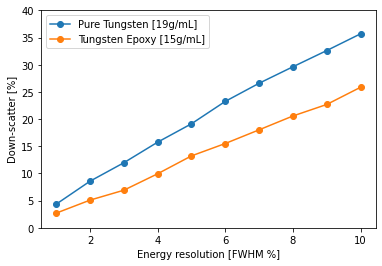

In [26]:
BI_BRATIO = 0.25
FR_BRATIO = 0.11
dscatter_tungsten = np.array([0.01911731, 0.03770872, 
                              0.05264302, 0.06931011, 
                              0.08418514, 0.10231394, 
                              0.11699248, 0.1303273 , 
                              0.14345971, 0.15700472])
dscatter_tungsten *= BI_BRATIO/FR_BRATIO
dscatter_tungsten_epoxy = np.array([0.01187335, 0.02239789, 
                                    0.03042071, 0.04372624, 
                                    0.05820106, 0.06823094, 
                                    0.07929247, 0.09050313, 
                                    0.09982227, 0.11374819])
dscatter_tungsten_epoxy *= BI_BRATIO/FR_BRATIO
e_ress = np.linspace(1,10,10)

plt.plot(e_ress,dscatter_tungsten*100,marker='o',label='Pure Tungsten [19g/mL]')
plt.plot(e_ress,dscatter_tungsten_epoxy*100,marker='o',label='Tungsten Epoxy [15g/mL]')
plt.ylim(0,40.)
plt.ylabel('Down-scatter [%]')
plt.xlabel('Energy resolution [FWHM %]')
plt.legend(loc='upper left')
plt.show()

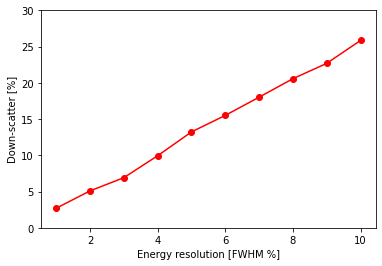

In [25]:
plt.plot(e_ress,dscatter_tungsten_epoxy*100,marker='o',label='Tungsten Epoxy [15g/mL]',color='Red')
plt.ylim(0,30.)
plt.ylabel('Down-scatter [%]')
plt.xlabel('Energy resolution [FWHM %]')
# plt.legend(loc='upper left')
plt.show()